<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/CVLC_05_No_Data_Argmentation(public_0_90686_private_0_89687).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dense
from keras.layers import Dropout

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [ ]:
# drop columns
x_train = train.drop(['id','digit','letter'],1)
x_train = x_train.values

In [ ]:
# reshape
x_train = x_train.reshape(-1,28,28,1)

In [ ]:
# 정규화
x_train = x_train/255

In [ ]:
# one hot encoder
def one_hot_encoder(x):
    y = np.zeros((len(x), len(np.unique(x))))  # 모든 값이 0인 백터
    for i, num in enumerate(x):
        y[i][num] = 1  # Label에 해당하는 인덱스에 1을 입력
    return y

In [ ]:
y_train = one_hot_encoder(train['digit'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(height_shift_range=(-1,1), width_shift_range=(-1,1))

In [ ]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])
    # add로 모델을 점진적으로 추가하기 위한 함수.
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10,activation='softmax'))

    return model

In [ ]:
# 모델만들기
model = create_cnn_model(x_train)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
64/64 [==============================] - 1s 9ms/step - loss: 0.2370 - accuracy: 0.9229
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.2153 - accuracy: 0.9263
Epoch 3/100
64/64 [==============================] - 1s 8ms/step - loss: 0.1723 - accuracy: 0.9429
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.1854 - accuracy: 0.9390
Epoch 5/100
64/64 [==============================] - 1s 8ms/step - loss: 0.2261 - accuracy: 0.9238
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.1835 - accuracy: 0.9395
Epoch 7/100
64/64 [==============================] - 1s 9ms/step - loss: 0.1843 - accuracy: 0.9419
Epoch 8/100
64/64 [==============================] - 1s 8ms/step - loss: 0.1795 - accuracy: 0.9404
Epoch 9/100
64/64 [==============================] - 1s 9ms/step - loss: 0.1947 - accuracy: 0.9316
Epoch 10/100
64/64 [==============================] - 1s 8ms/step - loss: 0.1682 - accuracy: 0.9438
Epoch 11/

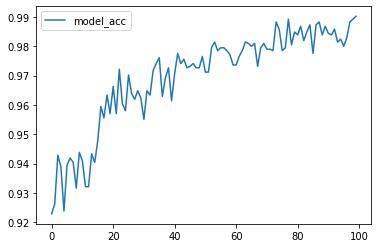

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label='model_acc')
plt.legend()
plt.show()

In [ ]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

In [ ]:
# 적용
sub['digit'] = np.argmax(model.predict(x_test), axis=1)
sub.head()

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3


In [ ]:
# 파일저장
sub.to_csv('baseline.csv', index=False)